<a href="https://colab.research.google.com/github/quocgon/PhanTichDuLieuVaHocSau/blob/master/Labs/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/covid19/'+filename)
dfcovid19 = load_data('countriessample.csv')
dfcovid19.head()

,Date,CountryRegion,Confirmed,Recovered,Deaths
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0
1,1/22/2020,Greece;Europe,NaN,NaN,0.0
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0
3,1/22/2020,India;Asia,0.0,NaN,0.0
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0


# Heatmap

The **heatmap** is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.

**Example 1**:

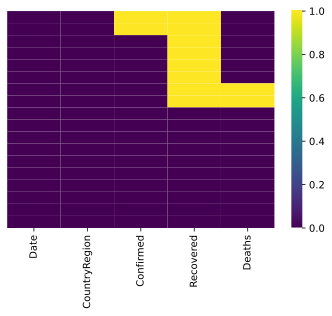

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(dfcovid19.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

# Apply function
Syntax:
DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)
(Details: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)

Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (**axis=0**) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

**Example 2**:Apply a function to each column of the dataframe
(source: https://datascienceparichay.com/article/apply-a-function-to-a-pandas-dataframe/)

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
})

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each subject
result = df.apply(get_mean)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

   History  Math  English
0       76    81       72
1       84    67       93
2       68    91       84
3       94    86       76

The result of applying the function on the dataframe:

History    80.50
Math       81.25
English    81.25
dtype: float64


**Example 3**: Apply a function to each row **(axis = 1)** of the dataframe

In [ ]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'History': [76, 84, 68, 94],
    'Math': [81, 67, 91, 86],
    'English': [72, 93, 84, 76]
}, index=['Sam', 'Greta', 'Mike', 'Emma'])

# print the dataframe
print("The original dataframe:\n")
print(df)

# function to be applied
def get_mean(scores):
    return sum(scores)/len(scores)

# get the mean score for each student
result = df.apply(get_mean, axis=1)
print("\nThe result of applying the function on the dataframe:\n")
print(result)

The original dataframe:

       History  Math  English
Sam         76    81       72
Greta       84    67       93
Mike        68    91       84
Emma        94    86       76

The result of applying the function on the dataframe:

Sam      76.333333
Greta    81.333333
Mike     81.000000
Emma     85.333333
dtype: float64


**Example 4**: Define function to split CountryRegion into country and region

In [ ]:
def split_name_series(string):
  country, region=string.split(';')
  return pd.Series(
      (country, region),
      index='country, region'.split()
  )

In [ ]:

def split_name(x_df):
    # Select the Name column and apply a function
    res=x_df['CountryRegion'].apply(split_name_series)
    x_df[res.columns]=res
    return x_df

# pipe() function
Syntax:

DataFrame.pipe(func, *args, **kwargs)

(source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pipe.html)

**Parameters**
func: function

> Function to apply to the Series/DataFrame. args, and kwargs are passed into func. Alternatively a (callable, data_keyword) tuple where data_keyword is a string indicating the keyword of callable that expects the Series/DataFrame.



args: iterable, optional

> Positional arguments passed into func.

kwargs: mapping, optional

> A dictionary of keyword arguments passed into func.

Returns

> objectthe return type of func.




**Example 5**: Split CountryRegion into country and region by using slip_name function in example 4

In [ ]:
res=load_data('countriessample.csv').pipe(split_name)
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,Africa
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,Europe
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,Europe
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,Asia
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,Asia
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,Asia
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,Asia
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,Europe
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,Africa
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,South America


#  map() function
 map() used for substituting each value in a Series with another value

**Example 6**:

In [ ]:
def substitute_region(x_df):
    mapping={'Africa':'AF', 'Asia':'AS','Europe':'EU','South America':'SA','North America':'NA'}
    x_df['region']=x_df['region'].map(mapping)
    return x_df

In [ ]:
res=(res.pipe(substitute_region))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA


# pandas.cut
**Syntax**:
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

See details at the link: https://pandas.pydata.org/docs/reference/api/pandas.cut.html#

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins

**Example 7**: Discretize into three equal-sized bins

In [ ]:
import pandas as pd
import numpy as np
a = pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

In [ ]:
a

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

**Example 8**:Discovers the same bins, but assign them specific labels. Notice that the returned Categorical’s categories are labels and is ordered

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]),bins = 3, labels=["bad", "medium", "good"])

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

**Example 9**: ordered=False will result in unordered categories when labels are passed. This parameter can be used to allow non-unique labels:

In [ ]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,labels=["B", "A", "B"], ordered=False)

['B', 'B', 'A', 'A', 'B', 'B']
Categories (2, object): ['A', 'B']

**Example 10**: Convert confirmed cases into 3 catorories: normal (<3000), medium ( <5000), and worst (>5000)

In [ ]:
def create_evaluation_group(x_df):
    bins=[0.0, 3000, 5000, sys.maxsize]
    labels=['normal', 'medium', 'worst']
    evaluationGroup=pd.cut(x_df['Confirmed'], bins=bins, labels=labels,include_lowest=True)
    x_df['Evaluation']=evaluationGroup
    return x_df

In [ ]:
res=(res.pipe(create_evaluation_group))
res

,Date,CountryRegion,Confirmed,Recovered,Deaths,"country,",region,Evaluation
0,1/22/2020,Ghana;Africa,NaN,NaN,0.0,Ghana,AF,NaN
1,1/22/2020,Greece;Europe,NaN,NaN,0.0,Greece,EU,NaN
2,1/22/2020,Iceland;Europe,0.0,NaN,0.0,Iceland,EU,normal
3,1/22/2020,India;Asia,0.0,NaN,0.0,India,AS,normal
4,1/22/2020,Indonesia;Asia,0.0,NaN,0.0,Indonesia,AS,normal
5,1/22/2020,Iran;Asia,0.0,NaN,0.0,Iran,AS,normal
6,1/22/2020,Iraq;Asia,0.0,NaN,NaN,Iraq,AS,normal
7,1/22/2020,Ireland;Europe,0.0,NaN,NaN,Ireland,EU,normal
8,6/6/2020,Guinea;Africa,4117.0,2857.0,23.0,Guinea,AF,medium
9,6/6/2020,Guyana;South America,154.0,80.0,12.0,Guyana,SA,normal


# BÀI THỰC HÀNH TRÌNH BÀY DỮ LIỆU 
 
Nội dung: Trực quan hóa dữ liệu điểm thi đã được xử lý processed_dulieuxettuyendaihoc.csv 
Mục tiêu: Sinh viên đạt được kiến thức sau. 
1. Trình bày dữ liệu cơ bản
2. Trực quan hóa dữ liệu cơ bản 

**Phần 1**: Thống kê dữ liệu 
1. Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần 
2. Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính 
3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT 
4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT và KV 
5. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1, Q2 và Q3 của DH1 theo KT, KV và DT 

**Phần 2**: Trình bày dữ liệu 

1. Hãy trình bày dữ liệu biến GT:


> Gợi ý - Lập bảng tần số và tần suất - Vẽ biểu đồ tần số (cột), biểu đồ tần suất (tròn) và biểu đồ tích lũy tần suất (đa giác tích lũy)


 2. Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3
 3. Hãy trình bày dữ liệu biến DT với các học sinh là nam 
 4. Hãy trình bày dữ liệu biến KV với các học sinh là nam thuộc dân tộc Kinh, có điểm thõa mãn điều kiện (DH1 >= 5.0 và DH2 >= 4.0 và DH3 >= 4.0) 
 5. Hãy trình bày dữ liệu lần lượt các biến DH1, DH2, DH3 lớn hơn bằng 5.0 và thuộc khu vực 2NT 

**Phần 3**: Trực quan hóa dữ liệu theo nhóm phân loại
1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked 
Gợi ý - Lọc dữ liệu giới tính là nữ - Oy: Chiều cao biểu đồ cột thể hiển số lượng học sinh theo xếp loại - Màu sắc thể hiện giá trị xếp loại: [Y, TB, K, G, XS] - Ox: thể hiện nhóm XL1, XL2 và XL3 
2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2 
3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi 
4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi
5. Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực.
6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc 
7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính

Phần 4: Trực quan hóa dữ liệu nâng cao 

1. Vẽ biểu đồ đường Simple cho biến T1 
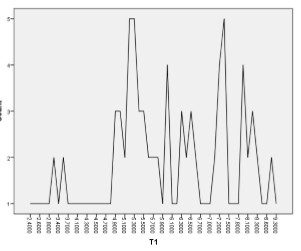

2. Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau:

  a. Từ 0 đến dưới 5 = kém (ký hiệu "k")

  b. Từ 5 đến dưới 7 = trung bình (ký hiệu "tb") 

  c. Từ 7 đến dưới 8 = khá (ký hiệu "k")
  
  d. Từ 8 trở lên = giỏi (ký hiệu "g") 

3. Lập bảng tần số cho biến phanloait1 
4. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1
 
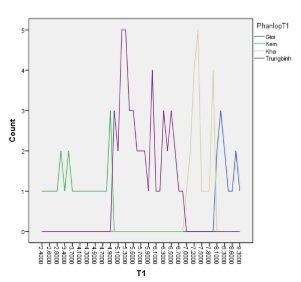

5. Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1 

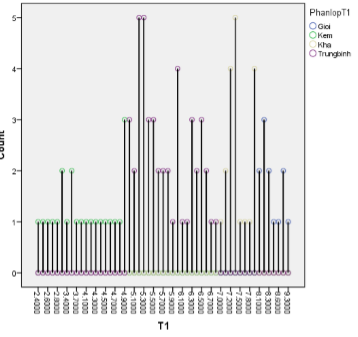

**Phần 5**: Mô tả dữ liệu và khảo sát dạng phân phối 
1. Hãy mô tả và khảo sát phân phối cho biến T1 

Gợi ý:
- Mô tả độ tập trung và phân tán của dữ liệu T1
- Vẽ biểu đồ Box-Plot và xác định các 10 đại lượng trong biểu đồ đó
- Mô tả hình dáng lệch của phân phối T1 dựa vào các đại lượng hướng tâm
- Vẽ biểu đồ Histogram biểu thị hình dáng phân phối
- Mô tả các đặc trưng của phân phối, mức độ lệch và mức độ nhọn  -
- Kiểm chứng phân phối chuẩn QQ-Plot
- Nhận xét và đánh giá về phân phối của T1
2. Hãy mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phân lớp (phanlopT1) 

Gợi ý:
- Trực quan hóa biểu đồ Box-plot, histogram và  QQ-plot  theo phân nhóm là giá trị của ‗phanlopT1‘. 
3. Hãy khảo sát tương quan giữa biến DH1 theo biến T1
Gợi ý:
- Nhận xét giá trị Covariance hoặc Correlation
- Vẽ biểu đồ Scatter thể hiện liên hệ của biến phụ thuộc DH1 theo biến độc lập T1

4. Hãy khảo sát tương quan giữa biến DH1 theo biến T1 trên từng nhóm khu vực 
5. Hãy khảo sát tương quan giữa các biến DH1, DH2,  DH3 

Gợi ý:
- Nhận xét ma trận hiệp phương sai hoặc ma trận tương quan
- Vẽ biểu đồ Scatter giữa các biến
